# Features and feature representations

In this notebook (and lecture) we will learn about features for data exploration and machine learning.

## Resources

* 10 Minutes to pandas¶: https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html
* codebasics: Python Pandas Tutorial: https://www.youtube.com/watch?v=CmorAWRsCAw

## Learning objectives

You should be able to:

* understand the importance of features in machine learning;
* understand the difference between types of features;
* load data from different sources;
* perform feature extraction from raw sources;
* understand the nature of the data via simple statistics.

## What is a feature?

A feature is defined as a specific, measurable characteristic of an instance.

### Feature extraction

* Raw input to feature vector
* $X \rightarrow \phi(x) \rightarrow \mathbb{R}^d$ where $d$ is the dimensionality of the feature vector

## Types of features

* **Numeric**
    * Discrete: (0, 1, 2, ...) or continuous (0.005, 2.998, ...)
* **Categorical**: a numeric assignment is meaningless
    * Colour: yellow, blue, orange
    * Day of week: Monday, Tuesday, ...
* **Ordinal**
    * Likert scale (0 = disagree, 6 = agree)

## Example features

Question: What is the *type* of each of the following features?

* A text document
    * The number of paragraphs (per page)
    * The number of times the word *machine* appears
* A dog
    * Fur length
    * Colour
    * Tail length
    * Height
* A mushroom
    * The presense of gills
    * Cap diameter

## What makes a good feature?

* Informative/discriminative: the feature helps us decide the class or group of an instance
* Independent: the feature is not correlated with other features

## Feature extraction

* How do we choose features?
* How do we extract them efficiently?

### Example: Iris dataset

In [1]:
# Standard imports for pandas and sklearn sample datasets
import pandas as pd
from sklearn import datasets

# Load the iris data
iris_data = datasets.load_iris()

# Convert it to a pandas DataFrame
df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)

# A summary of the data
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [2]:
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

#### Discussion: What kind of features are these? How were these features extracted?

## Feature representations

* We represent an instance with a *feature vector*

In [3]:
# Use slices to show the second row (feature vector)
df[2:3]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
2,4.7,3.2,1.3,0.2


In [4]:
# Or alternatively
df.iloc[3]

sepal length (cm)    4.6
sepal width (cm)     3.1
petal length (cm)    1.5
petal width (cm)     0.2
Name: 3, dtype: float64

In [5]:
# Show the sample (feature vector) with the largest petal length
df[:][df['petal length (cm)']==df['petal length (cm)'].max()]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
118,7.7,2.6,6.9,2.3


In [6]:
# Show samples (feature vectors) with petal lengths larger than 6cm
df[df['petal length (cm)'] > 6.0]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
105,7.6,3.0,6.6,2.1
107,7.3,2.9,6.3,1.8
109,7.2,3.6,6.1,2.5
117,7.7,3.8,6.7,2.2
118,7.7,2.6,6.9,2.3
122,7.7,2.8,6.7,2.0
130,7.4,2.8,6.1,1.9
131,7.9,3.8,6.4,2.0
135,7.7,3.0,6.1,2.3


* Multiple instances are combined into a *feature matrix* (a *DataFrame* in pandas), where each instance is a row, and each column is a feature.

In [7]:
# Show the number of rows and columns in the DataFrame 
df.shape

(150, 4)

### Discussion

1. How many instances in the iris dataset? How many features?
    * More complex representations possible (e.g., hierarchical), but many ML algorithms expect data in a matrix format (rows = instances, columns = features).

2. How can we represent a corpus of text documents? For example, all Wikipedia pages?

3. How can we represent a corpus of images, each of size 800x600 @ 24bpp (bits per pixel)?

4. What about audio samples? What if the samples are of different lengths?

5. What about video?

# Visualisation

Pandas documentation on visualisation https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

## Box plots

<Figure size 432x288 with 0 Axes>

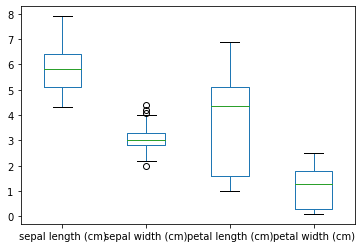

In [17]:
import matplotlib.pyplot as plt
plt.figure()
df.plot.box()

## Histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8de456e730>,
      dtype=object)

<Figure size 432x288 with 0 Axes>

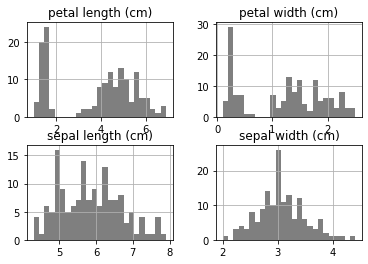

In [27]:
plt.figure()
df.hist(color='k', alpha=0.5, bins=25)

# Scatter matrix

array([[<Axes: xlabel='a', ylabel='a'>, <Axes: xlabel='b', ylabel='a'>,
        <Axes: xlabel='c', ylabel='a'>, <Axes: xlabel='d', ylabel='a'>],
       [<Axes: xlabel='a', ylabel='b'>, <Axes: xlabel='b', ylabel='b'>,
        <Axes: xlabel='c', ylabel='b'>, <Axes: xlabel='d', ylabel='b'>],
       [<Axes: xlabel='a', ylabel='c'>, <Axes: xlabel='b', ylabel='c'>,
        <Axes: xlabel='c', ylabel='c'>, <Axes: xlabel='d', ylabel='c'>],
       [<Axes: xlabel='a', ylabel='d'>, <Axes: xlabel='b', ylabel='d'>,
        <Axes: xlabel='c', ylabel='d'>, <Axes: xlabel='d', ylabel='d'>]],
      dtype=object)

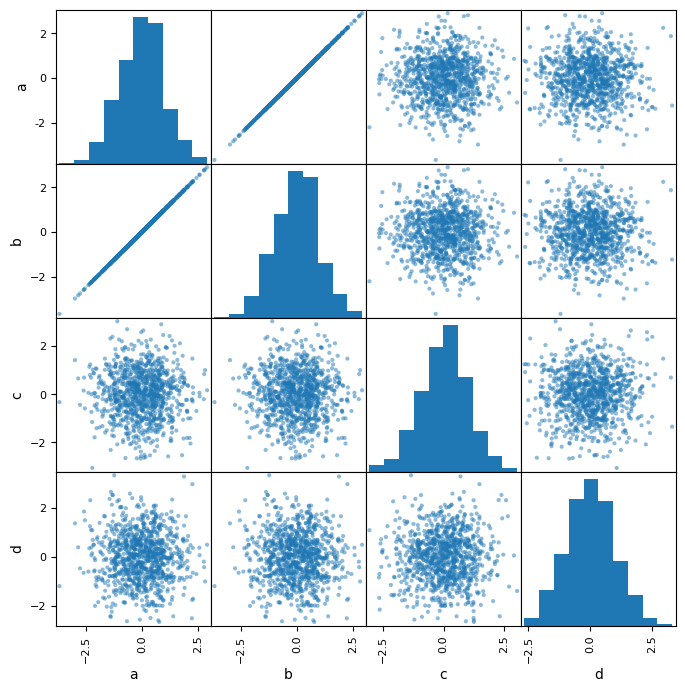

In [2]:
import numpy as np
from pandas.plotting import scatter_matrix

df_rand = pd.DataFrame(np.random.randn(1000, 4), columns=['a', 'b', 'c', 'd'])
df_rand['a']=df_rand['b']
scatter_matrix(df_rand, figsize=(8,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8dd79d0ee0>,
      dtype=object)

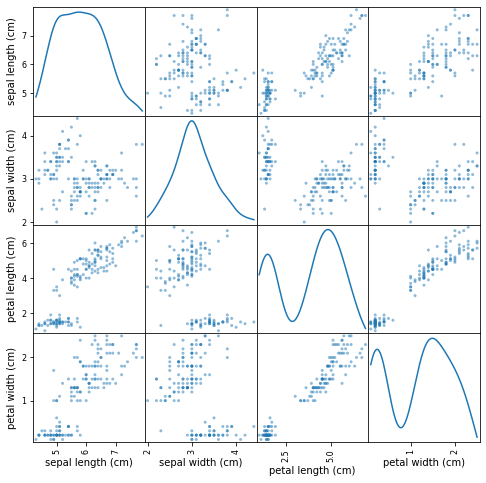

In [33]:
scatter_matrix(df, figsize=(8,8), diagonal='kde')

## Missing data

Pandas documentation on missing data https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html

Data collection and feature extraction is not a perfect process; a lot of data may be missing.

Missing values can be caused by:

* Non-response (no data reported for a feature or instance)
* Attrition (diminishing response over longitudinal studies)
* Failure to report
* Errors in data collection or feature extraction

### Dealing with missing data

* Imputation (filling in), interpolation
* Machine learning (e.g., topic modeling)

### Data sparsity

A lot of data is *sparse*, meaning there are a lot of missing values.

* Netflix film ratings example: assume 100,000 films/TV series and 130,000,000 subscribers. If we want to store a rating between 0-10 for each user and each film, how much storage do we need?
* Now assume that an average user rates 200 films. What percentage of our data will consist of unrated films?
* Discuss the storage implications.

# Text corpus example (20 newsgroups)

The 20 newsgroups dataset is roughly 18000 newsgroup posts in 20 topics.

We will loosely follow the example here:

scikit-learn 20 newsgroups text data set: http://scikit-learn.org/stable/datasets/twenty_newsgroups.html

## Relevant resources

* http://scikit-learn.org/stable/auto_examples/text/document_classification_20newsgroups.html
* http://scikit-learn.org/stable/auto_examples/model_selection/grid_search_text_feature_extraction.html

In [10]:
from sklearn.datasets import fetch_20newsgroups
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes')) # all, train, test
# List the categories (topics)
newsgroups.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [11]:
# Feature extraction with the sklearn TF-IDF vectoriser
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
vectorizer = TfidfVectorizer()
#vectorizer = CountVectorizer()
vectors = vectorizer.fit_transform(newsgroups.data)

# Show the shape of the document-term matrix in format (document, word)
vectors.shape

(18846, 134410)

In [12]:
# How sparse is the document-term matrix? (%)
vectors.nnz / float(vectors.shape[0]*vectors.shape[1]) * 100.0

0.07130067967636976

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Sort: indices now can be used to sort by newsgroup below
indices = np.argsort(newsgroups.filenames)

# Show sorted documents
print(newsgroups.filenames[indices])

# Show target classes (newsgroup, e.g., alt.atheism), sorted here
print(newsgroups.target[indices])

# Count word frequencies throughout all documents
freqs = vectors[indices].sum(axis=0)
# Sort word frequencies
i = np.argsort(freqs)
vocab = pd.Series(vectorizer.vocabulary_)

# What is the most common word?
print(vocab[vocab.values==i[...,-1].item()])

# Plot document-term matrix, blue indicates non-zero value
plt.spy(vectors[indices], markersize=0.01)
fig = plt.gcf()
fig.set_size_inches(60,60)
plt.plot()
plt.show()

['/home/donn/scikit_learn_data/20news_home/20news-bydate-test/alt.atheism/53068'
 '/home/donn/scikit_learn_data/20news_home/20news-bydate-test/alt.atheism/53257'
 '/home/donn/scikit_learn_data/20news_home/20news-bydate-test/alt.atheism/53260'
 ...
 '/home/donn/scikit_learn_data/20news_home/20news-bydate-train/talk.religion.misc/84446'
 '/home/donn/scikit_learn_data/20news_home/20news-bydate-train/talk.religion.misc/84507'
 '/home/donn/scikit_learn_data/20news_home/20news-bydate-train/talk.religion.misc/84558']
[ 0  0  0 ... 19 19 19]
the    116790
dtype: int64


<Figure size 6000x6000 with 1 Axes>

We see that "the" is the most common word in the vocabulary. For the above figure, recall that the x-axis is documents (each row a single newsgroup post), and the y-axis are the terms in the vocabulary.

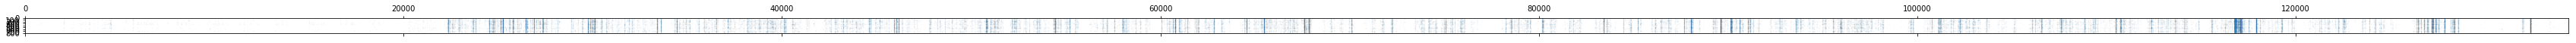

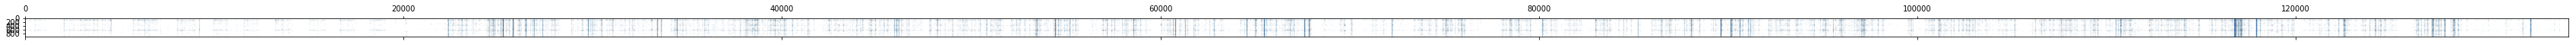

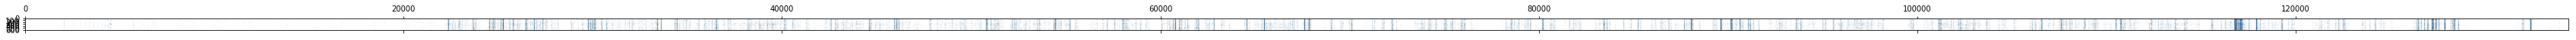

In [14]:
# alt.atheism
plt.spy(vectors[indices][newsgroups.target[indices]==0], markersize=0.01)
fig = plt.gcf()
fig.set_size_inches(60,60)
plt.plot()
plt.show()

# comp.graphics
plt.spy(vectors[indices][newsgroups.target[indices]==1], markersize=0.01)
fig = plt.gcf()
fig.set_size_inches(60,60)
plt.plot()
plt.show()

# talk.religion.misc
plt.spy(vectors[indices][newsgroups.target[indices]==19], markersize=0.01)
fig = plt.gcf()
fig.set_size_inches(60,60)
plt.plot()
plt.show()

# Exercise 5


1. Download the mushroom dataset here: https://archive.ics.uci.edu/ml/datasets/Mushroom
2. Create a new Jupyter notebook
3. Load the dataset from CSV into pandas
4. Explore the distributions in the data. For example, how is habitat distributed between edibility vs non-edibility?
5. The data is entirely categorical. Convert each feature to dummy variables.
6. Visualise the feature space using a similar method to the one we used for the 20 newgroups dataset.

Your submission should be your Jupyter notebook, keep it short and concise.